In [4]:
"""
Santosh Omprakash
"""

'\nSantosh Omprakash\n'

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [6]:
# The data cleaned in project milestone 2, 3 and 4 is stored in CSV file. Read those data 
carfile_df = pd.read_csv("cars_from_file.csv")
carweb_df = pd.read_csv("cars_from_web.csv")
carapi_df = pd.read_csv("cars_from_api.csv")

In [7]:
carfile_df

,make,model,price_USD,cylinders,odometer,transmission,style,size,title_status,color,mileage,state,owner_dealer,year
0,kia,sorento lx sport utility 4d,16590,NaN,38861.0,automatic,other,NaN,clean,NaN,NaN,alabama,dealer,2017
1,lexus,es 350 sedan 4d,23990,6,42418.0,automatic,sedan,NaN,clean,silver,NaN,alabama,dealer,2016
2,buick,encore preferred sport,13990,NaN,26324.0,automatic,other,NaN,clean,NaN,NaN,alabama,dealer,2017
3,jaguar,f-type coupe 2d,36990,6,20061.0,automatic,coupe,NaN,clean,black,NaN,alabama,dealer,2017
4,jeep,wrangler,9000,6,279000.0,automatic,SUV,NaN,clean,black,NaN,alabama,owner,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10507,jeep,cherokee sport,16995,6,105421.0,automatic,SUV,mid-size,clean,black,NaN,wyoming,dealer,2017
10508,cadillac,cts,9000,6,NaN,automatic,NaN,NaN,clean,brown,NaN,wyoming,owner,2009
10509,ford,f150 supercrew,26999,6,82500.0,automatic,truck,full-size,clean,grey,NaN,wyoming,owner,2017
10510,volkswagen,gti,17000,NaN,47000.0,automatic,NaN,NaN,clean,NaN,NaN,wyoming,owner,2016


In [8]:
carfile_df1 = carfile_df.rename(columns={"make": "Make", "model": "Model", "price_USD": "Price_USD", "cylinders": "Cylinders", 
                                     "odometer": "Odometer", "transmission": "Transmission", "style": "Style",
                                     "size": "Size", "tile_status": "Tile_status", "color": "Color", "mileage": "Mileage",
                                     "state": "State", "owner_dealer": "Owner_dealer", "year": "Year"})

In [9]:
# Convert Make values to upper case
carfile_df1['Make'] = carfile_df1['Make'].str.upper()

In [10]:
# Conver Model values to upper case
carfile_df1['Model'] = carfile_df1['Model'].str.upper()

In [11]:
# Drop duplicates by Make and Model
carfile_df1 = carfile_df1.drop_duplicates(subset=['Make', 'Model'])

In [12]:
# Sort data by Make
carfile_df2 = carfile_df1.sort_values('Make')

In [13]:
# Remove extra characters after space in Model as it would not result in match while merging
carfile_df2['Model'] = carfile_df2['Model'].str.split(' ').str[0]

In [14]:
carfile_df2 

,Make,Model,Price_USD,Cylinders,Odometer,Transmission,Style,Size,title_status,Color,Mileage,State,Owner_dealer,Year
8983,ACCORD,NaN,1200,NaN,NaN,automatic,sedan,NaN,clean,NaN,NaN,texas,owner,2008
8256,ACCURA,TL,3000,6,189674.0,automatic,sedan,mid-size,clean,white,NaN,rhode island,owner,2003
525,ACURA,RL,7499,6,NaN,automatic,sedan,NaN,clean,white,NaN,arizona,dealer,2010
3994,ACURA,LEXUS,279,NaN,NaN,automatic,NaN,NaN,clean,NaN,NaN,louisiana,dealer,2015
2334,ACURA,RDX,7500,NaN,NaN,automatic,NaN,NaN,clean,NaN,NaN,hawaii,owner,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,WILLYS,JEEP,54995,NaN,1.0,automatic,pickup,NaN,clean,blue,NaN,delaware,dealer,1954
4055,YAMAHA,YFZR3,4995,NaN,3933.0,manual,other,NaN,clean,blue,NaN,maine,dealer,2018
8578,YUKON,DENALI,8900,8,190000.0,automatic,SUV,NaN,clean,NaN,NaN,south dakota,dealer,2009
1730,YUKON,XL,3200,8,218000.0,automatic,SUV,full-size,clean,black,NaN,delaware,owner,2004


In [15]:
carweb_df['Make'] = carweb_df['Make'].str.upper()

In [16]:
carweb_df['Model'] = carweb_df['Model'].str.upper()

In [17]:
carweb_df

,Make,Model,ProductionYear,Sales,Assembly
0,AC,3000ME,1979–1984,Approximately 107 in a single generation.,United Kingdom
1,AC/SHELBY,COBRA,1961–2004,"1,003 in a single generation up to 1967. Figur...",United Kingdom
2,AC,FRUA,1965–1973,81 in a single generation.,United Kingdom
3,ALFA,ROMEO 75,1985–1992,"386,767 in a single generation.",Italy
4,ALFA,ROMEO 33,1983–1995,"989,324 including sedan, wagon and 4x4 version.",Italy
...,...,...,...,...,...
466,VOLVO,V70/XC70,1996–2016,"1,381,488 in three generations.",NaN
467,WILLYS,77,1933–36,Willys' best selling nameplate; approximately ...,United States
468,YUGO,NaN,1977-2008,"794,428 produced, with 141,651 exported to the...",YugoslaviaSerbia
469,ZAZ,965 ZAPOROZHETS,1960–69,322 106 built at ZAZ in the Ukrainian SSR.,Soviet Union


In [18]:
carapi_df['Model'] = carapi_df['Model'].str.upper()

In [19]:
carapi_df

,Make,Model
0,AAS,TROPHY EDITION
1,AAS,SPORT EDITION
2,AAS,PERFORMANCE EDITION
3,AAS,RACE EDITION
4,AAS,EURO EDITION
...,...,...
3455,ZHEJIANG KANGDI VEHICLES CO,K23-300
3456,ZHEJIANG KANGDI VEHICLES CO,K27-300
3457,ZHEJIANG KANGDI VEHICLES CO,K28-300
3458,ZHEJIANG KANGDI VEHICLES CO,K30


In [20]:
# Merge flat file data and Website data
car_apinweb = pd.merge(carapi_df, carweb_df, how='inner', on=['Make', 'Model'])

In [21]:
car_apinweb

,Make,Model,ProductionYear,Sales,Assembly
0,AUDI,A4,1994–present,"5,000,000 until 30 March 2011.","Germany, Japan, China, India and Indonesia"
1,AUDI,A3,1996–present,"3,000,000th built in July 2013 over three gene...","Germany, Brazil, Belgium, Hungary, India and C..."
2,AUDI,R8,2007–present,"50,700 by the end of 2013",Germany
3,BMW,X5,1999–present,"1,000,000 in two generations up to June 2010.",NaN
4,BMW,I3,2013–present,"OVer 165,000 through December 2019.",NaN
...,...,...,...,...,...
115,TOYOTA,MIRAI,2015–present,"2,840 units by mid-February 2017.in Japan, the...",NaN
116,VOLKSWAGEN,GOLF,1974–present,"Became Volkswagen's bestseller in 2002; 30,000...",NaN
117,VOLKSWAGEN,PASSAT,1973–present,"Over 15,000,000 in six generations.",NaN
118,VOLKSWAGEN,JETTA,1980–present,"Sedan version of the Volkswagen Golf; over 6,6...",NaN


In [22]:
# Merge API data and carfile data(flat file+website data)
car_comball = pd.merge(car_apinweb, carfile_df2, how='inner', on=['Make', 'Model'])

In [23]:
car_comball

,Make,Model,ProductionYear,Sales,Assembly,Price_USD,Cylinders,Odometer,Transmission,Style,Size,title_status,Color,Mileage,State,Owner_dealer,Year
0,AUDI,A4,1994–present,"5,000,000 until 30 March 2011.","Germany, Japan, China, India and Indonesia",9995,NaN,110389.0,automatic,sedan,NaN,clean,silver,NaN,oregon,dealer,2009
1,AUDI,A4,1994–present,"5,000,000 until 30 March 2011.","Germany, Japan, China, India and Indonesia",6990,NaN,130000.0,automatic,sedan,compact,clean,red,NaN,florida,dealer,2010
2,AUDI,A4,1994–present,"5,000,000 until 30 March 2011.","Germany, Japan, China, India and Indonesia",3600,4,136000.0,automatic,NaN,NaN,clean,silver,NaN,massachusetts,owner,2007
3,AUDI,A4,1994–present,"5,000,000 until 30 March 2011.","Germany, Japan, China, India and Indonesia",5000,4,170000.0,manual,sedan,compact,clean,silver,NaN,minnesota,owner,2004
4,AUDI,A4,1994–present,"5,000,000 until 30 March 2011.","Germany, Japan, China, India and Indonesia",14990,NaN,90005.0,automatic,sedan,NaN,clean,black,NaN,connecticut,dealer,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,VOLKSWAGEN,JETTA,1980–present,"Sedan version of the Volkswagen Golf; over 6,6...",NaN,6000,NaN,69065.0,manual,sedan,NaN,clean,white,NaN,tennessee,dealer,2007
532,VOLKSWAGEN,JETTA,1980–present,"Sedan version of the Volkswagen Golf; over 6,6...",NaN,5500,NaN,179234.0,automatic,wagon,NaN,clean,silver,NaN,tennessee,dealer,2011
533,VOLKSWAGEN,BEETLE,1938–2003,"21,529,464; the bestselling single design in h...",NaN,8000,5,1.0,automatic,sedan,compact,clean,blue,NaN,arizona,owner,2013
534,VOLKSWAGEN,BEETLE,1938–2003,"21,529,464; the bestselling single design in h...",NaN,15495,4,47312.0,automatic,convertible,NaN,clean,black,NaN,ohio,dealer,2013


In [24]:
# Load combined dataframe to sqlite database
conn = sqlite3.connect('C:/Users/oneor/Downloads/Untitled Folder/carscomb.sqlite')

In [25]:
car_comball.to_sql('carsdb', conn, if_exists='replace', index=False)

In [26]:
# Check if database load is successful
cursor = conn.execute("SELECT * FROM carsdb")

In [27]:
rows = cursor.fetchall()
rows

[('AUDI',
  'A4',
  '1994–present',
  '5,000,000 until 30 March 2011.',
  'Germany, Japan, China, India and Indonesia',
  9995,
  None,
  110389.0,
  'automatic',
  'sedan',
  None,
  'clean',
  'silver',
  None,
  'oregon',
  'dealer',
  2009),
 ('AUDI',
  'A4',
  '1994–present',
  '5,000,000 until 30 March 2011.',
  'Germany, Japan, China, India and Indonesia',
  6990,
  None,
  130000.0,
  'automatic',
  'sedan',
  'compact',
  'clean',
  'red',
  None,
  'florida',
  'dealer',
  2010),
 ('AUDI',
  'A4',
  '1994–present',
  '5,000,000 until 30 March 2011.',
  'Germany, Japan, China, India and Indonesia',
  3600,
  '4',
  136000.0,
  'automatic',
  None,
  None,
  'clean',
  'silver',
  None,
  'massachusetts',
  'owner',
  2007),
 ('AUDI',
  'A4',
  '1994–present',
  '5,000,000 until 30 March 2011.',
  'Germany, Japan, China, India and Indonesia',
  5000,
  '4',
  170000.0,
  'manual',
  'sedan',
  'compact',
  'clean',
  'silver',
  None,
  'minnesota',
  'owner',
  2004),
 ('AUDI'

In [28]:
type(cursor)

sqlite3.Cursor

In [29]:
db_df = pd.read_sql('SELECT * FROM carsdb', conn)

In [30]:
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Make            536 non-null    object 
 1   Model           536 non-null    object 
 2   ProductionYear  536 non-null    object 
 3   Sales           536 non-null    object 
 4   Assembly        70 non-null     object 
 5   Price_USD       536 non-null    int64  
 6   Cylinders       333 non-null    object 
 7   Odometer        464 non-null    float64
 8   Transmission    536 non-null    object 
 9   Style           405 non-null    object 
 10  Size            193 non-null    object 
 11  title_status    532 non-null    object 
 12  Color           394 non-null    object 
 13  Mileage         0 non-null      object 
 14  State           536 non-null    object 
 15  Owner_dealer    536 non-null    object 
 16  Year            536 non-null    int64  
dtypes: float64(1), int64(2), object(14)

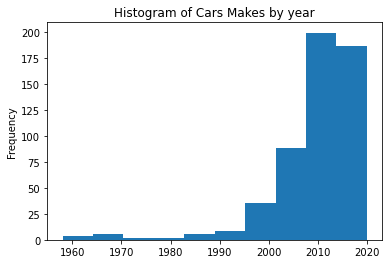

In [31]:
plt.title('Histogram of Cars Makes by year')
db_df['Year'].plot(kind='hist')

Text(0, 0.5, 'Count')

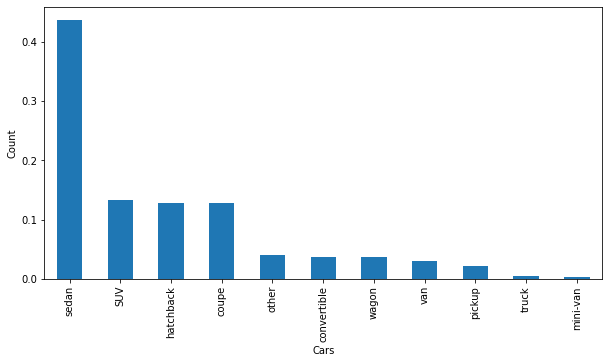

In [32]:
# Bar chart
plt.figure(figsize=(10,5))
db_df["Style"].value_counts(normalize=True).plot.bar()
plt.xlabel("Cars")
plt.ylabel("Count")

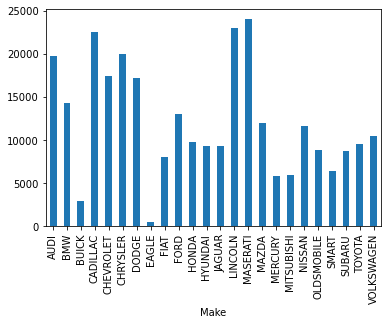

In [33]:
# Bar plot
# Mean price of Cars by Make
db_df.groupby("Make")['Price_USD'].mean().plot(kind='bar')

<Figure size 720x360 with 0 Axes>

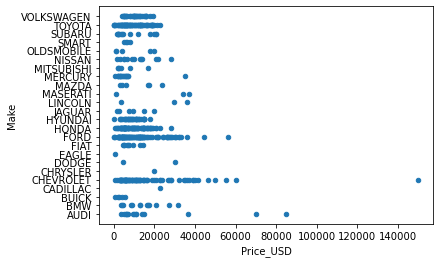

In [34]:
# Scatter plot of car Price_USD vs Make
plt.figure(figsize=(10,5))
db_df.plot.scatter(x='Price_USD', y='Make')
plt.show()

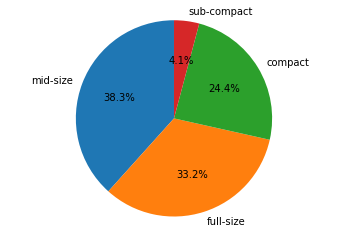

In [35]:
col = "Size"
grouped = db_df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

# plot
labels = grouped[col]
sizes = grouped['count']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  

plt.show()

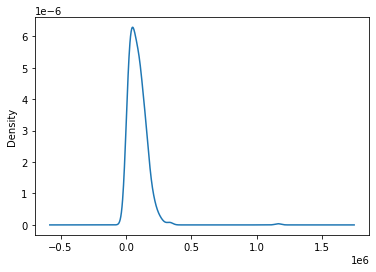

In [36]:
# Density plot of Odometer
db_df['Odometer'].plot.kde()